In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('bhp.csv')

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_57110/444223740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


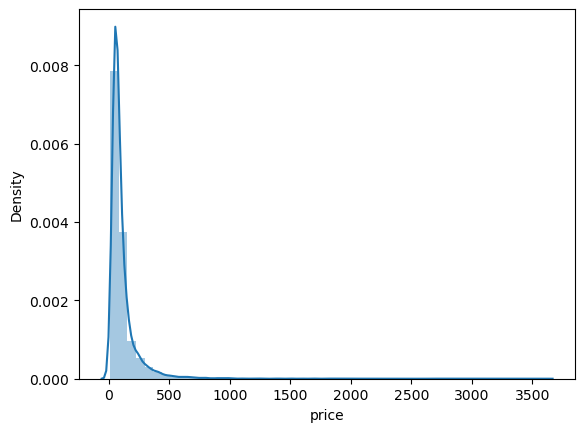

In [15]:
sns.distplot(df['price'])

plt.show()

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_57110/203531313.py:2: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis([0,0,0,500])


(-0.05, 0.05, 0.0, 500.0)

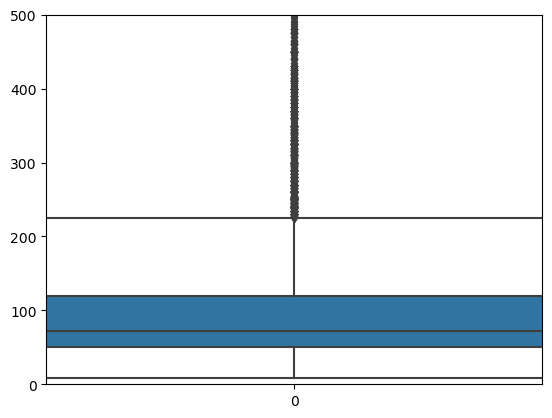

In [20]:
sns.boxplot(df['price'])
plt.axis([0,0,0,500])

In [21]:
q1=df['price'].quantile(0.25)

q3=df['price'].quantile(0.75)


In [23]:
print(q1,',',q3)

50.0 , 120.0


In [24]:
IQR=q3-q1

In [26]:
IQR

70.0

In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
min= q1-1.5*IQR
max= q3+1.5*IQR

In [29]:
max, min

(225.0, -55.0)

In [30]:
df[(df['price']<min) | (df['price']>max)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
...,...,...,...,...,...,...,...
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


## trimming

In [32]:
new_df=df[(df['price']>min) & (df['price']<max)]

In [33]:
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_57110/140607896.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_57110/140607896.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['price'])


<Axes: >

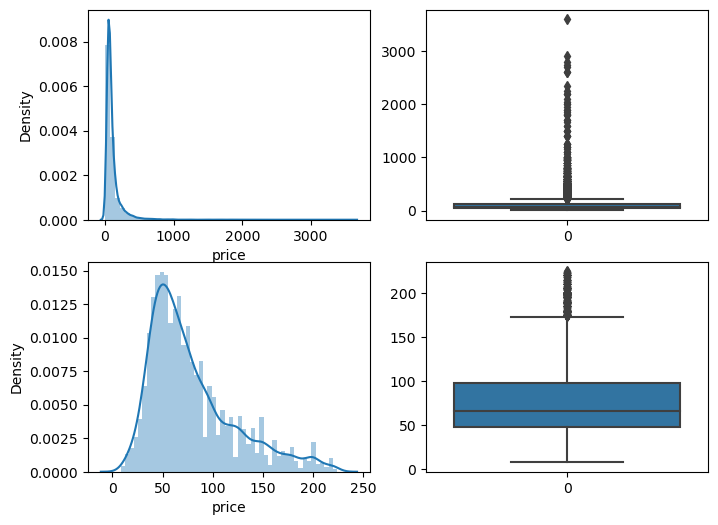

In [34]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.distplot(df['price'])

plt.subplot(2,2,2)
sns.boxplot(df['price'])

plt.subplot(2,2,3)
sns.distplot(new_df['price'])

plt.subplot(2,2,4)
sns.boxplot(new_df['price'])

## Capping

In [39]:
df['price']=np.where(df['price']<min,min,np.where(df['price']>max,max,df['price']))

In [40]:
df.shape

(13200, 7)

<Axes: >

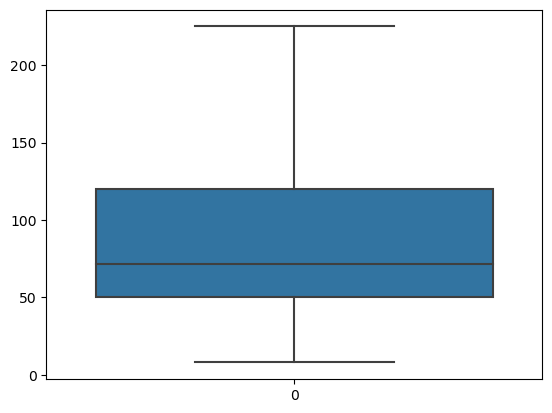

In [41]:
sns.boxplot(df['price'])

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_57110/444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

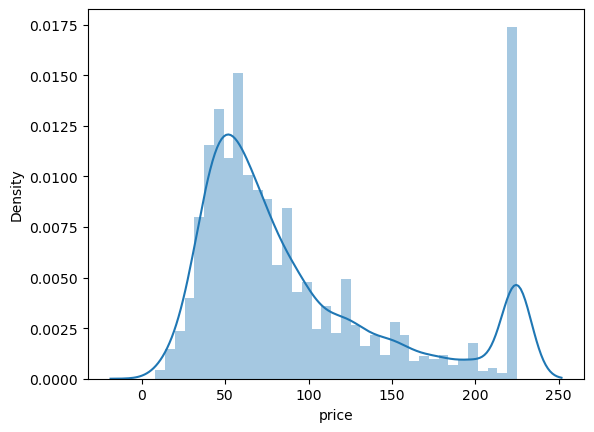

In [42]:
sns.distplot(df['price'])